<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/classification_10_food_viet_nam_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/food/train'
TEST_DIR = '../content/drive/MyDrive/food/test'

seed = 10

BATCH_SIZE = 16



In [ ]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 1619 images belonging to 10 classes.
Found 399 images belonging to 10 classes.
Found 431 images belonging to 10 classes.
Classes: ['banh_chung', 'banh_mi', 'banh_xeo', 'canh_kho_qua', 'com_tam', 'ga', 'goi_tron', 'pho bo', 'thit kho', 'xoi']


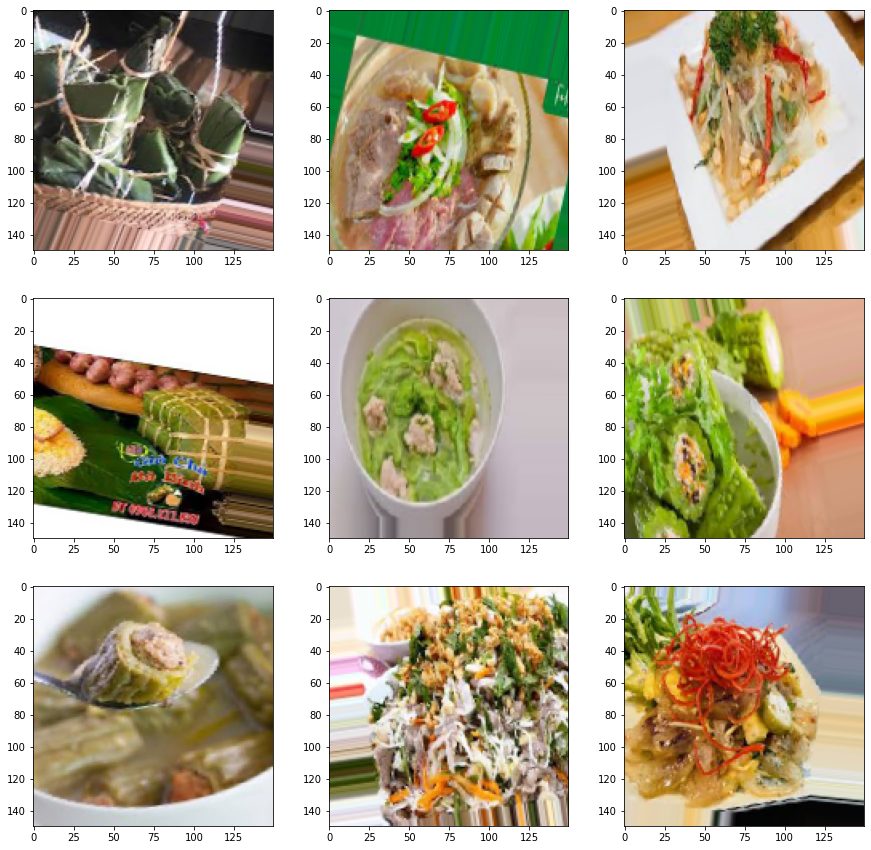

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 331776)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               42467456  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=100,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100
101/101 [==============================] - ETA: 0s - loss: 3.8823 - accuracy: 0.1323

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


101/101 [==============================] - 15s 139ms/step - loss: 3.8823 - accuracy: 0.1323 - val_loss: 2.2311 - val_accuracy: 0.2474
Epoch 2/100
101/101 [==============================] - 14s 137ms/step - loss: 2.2183 - accuracy: 0.1759 - val_loss: 2.0623 - val_accuracy: 0.2448
Epoch 3/100
101/101 [==============================] - 14s 143ms/step - loss: 2.1756 - accuracy: 0.2152 - val_loss: 2.0401 - val_accuracy: 0.2474
Epoch 4/100
101/101 [==============================] - 16s 154ms/step - loss: 2.1302 - accuracy: 0.2096 - val_loss: 1.9658 - val_accuracy: 0.3151
Epoch 5/100
101/101 [==============================] - 14s 141ms/step - loss: 2.1247 - accuracy: 0.2165 - val_loss: 1.9609 - val_accuracy: 0.2917
Epoch 6/100
101/101 [==============================] - 14s 139ms/step - loss: 2.0658 - accuracy: 0.2545 - val_loss: 1.9082 - val_accuracy: 0.3464
Epoch 7/100
101/101 [==============================] - 14s 135ms/step - loss: 2.1066 - accuracy: 0.2302 - val_loss: 1.9549 - val_accurac

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
model.save('/content/drive/MyDrive/final.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/final.h/assets


In [ ]:
model5 = tf.keras.models.load_model('/content/drive/MyDrive/final.h')

'thit kho'

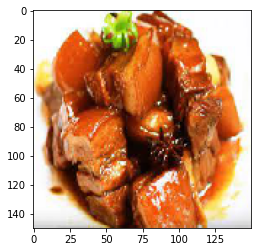

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'pho bo'

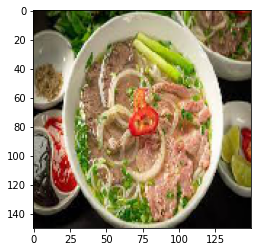

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'com_tam'

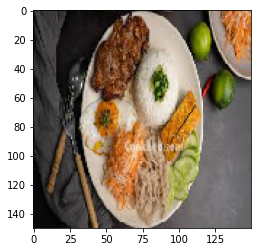

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'banh_xeo'

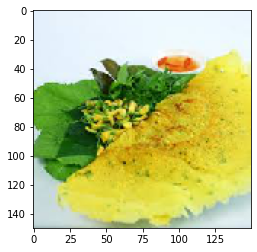

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred5.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'banh_chung'

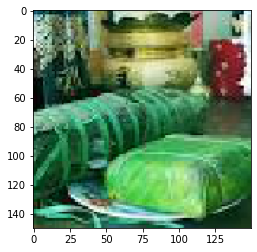

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred6.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'xoi'

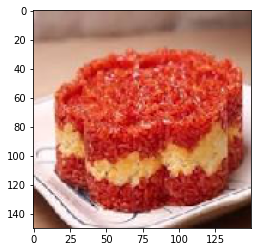

In [ ]:
img=load_img('/content/drive/MyDrive/food/pred/pred7.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]